In [1]:
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_mnist():
    points = []
    labels = []
    with open ("../Datasets/mnist.csv", 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != 0:
                        float_row.append(float(row[i]))
                points.append(tf.reshape(tf.Variable(np.array(float_row)), [28, 28]))
                labels.append(int(row[0]))
    return points, labels

In [3]:
def test_point(points, labels, point_number, sess):
    print("label = " + str(labels[point_number]))
    plt.imshow(sess.run(points[point_number]), 'RdPu')

In [4]:
mnist_points, mnist_labels = read_mnist()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
from PIL import Image
import os

In [6]:
def read_not_mnist():
    tensor_points = []
    labels = []
    for path, subdirs, files in os.walk("../Datasets/notMNIST_small"):
        for name in files:
            try:
                im = Image.open(os.path.join(path, name), 'r')
                width, height = im.size
                pixel_values = list(im.getdata())
                tensor_points.append(tf.reshape(tf.Variable(pixel_values), [width, height]))
                labels.append(path.split("/")[-1])
            except:
                pass  
    return tensor_points, labels

In [7]:
not_mnist_points, not_mnist_labels = read_not_mnist()

In [8]:
init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)        

Instructions for updating:
Use `tf.global_variables_initializer` instead.


label = 5


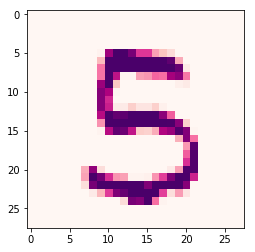

In [10]:
test_point(mnist_points, mnist_labels, 187, sess)

label = B


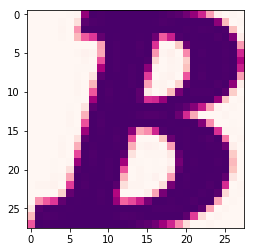

In [11]:
test_point(not_mnist_points, not_mnist_labels, 18000, sess)

label = 0


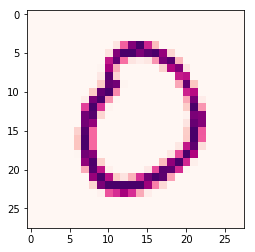

In [12]:
test_point(mnist_points, mnist_labels, 1777, sess)

label = G


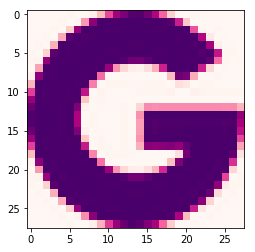

In [13]:
test_point(not_mnist_points, not_mnist_labels, 1963, sess)